# Link prediction - Exploration

In this notebook we will get you acquainted with the problem of link prediction. Roughly speaking, link prediction methods take a graph $G = (V, E)$ where the edge set $E$ is *incomplete*. The task of link prediction methods is then to point out likely missing edges from $E$. We will start looking at a simple graph where you probably see exactly where the missing links are.

*IMPORTANT: load data using the function `read_edgelist`*

**Exercise 1.** Write code to read the graph in the file ```graph_with_missing_links_1.gz```, and plot it. In this graph some arcs are missing. Try to identify by simply looking at the graph where arcs could be missing. What is the reason behing your choice?

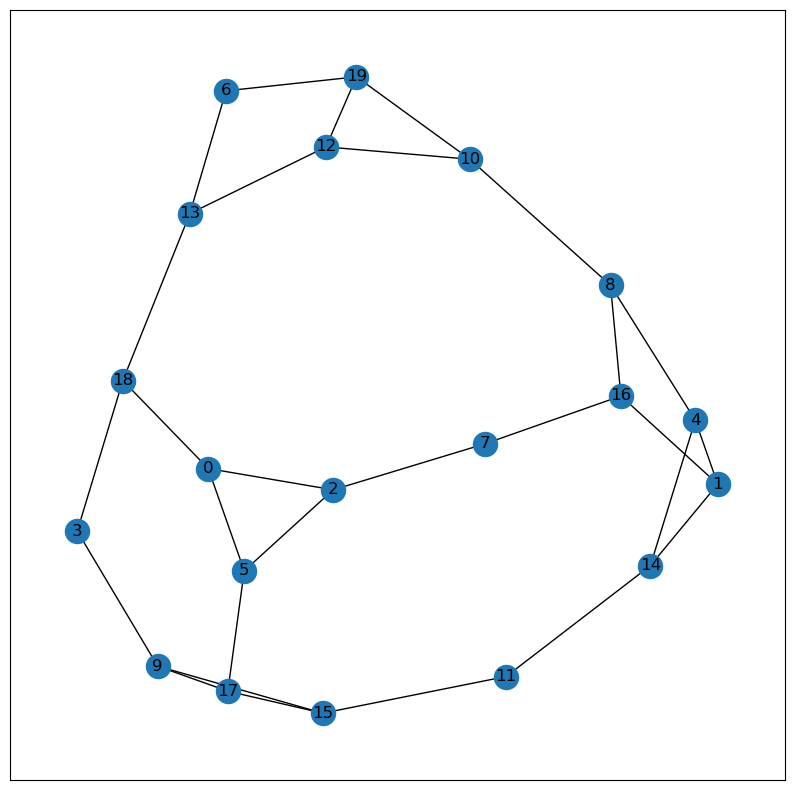

In [30]:
import networkx as nx

file_path = '../Data sets/Link Prediction/graph_with_missing_links_1.gz'
G = nx.read_edgelist(file_path)

#plot G
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G, node_size=300)
plt.show()

**Exercise 2.** Write a function that puts your reasoning in previous question into practice. Ensure it outputs *one* edge that is most likely missing. Test your code on the previous graph. Does it output an edge you expected? If it did not: can you explain why?

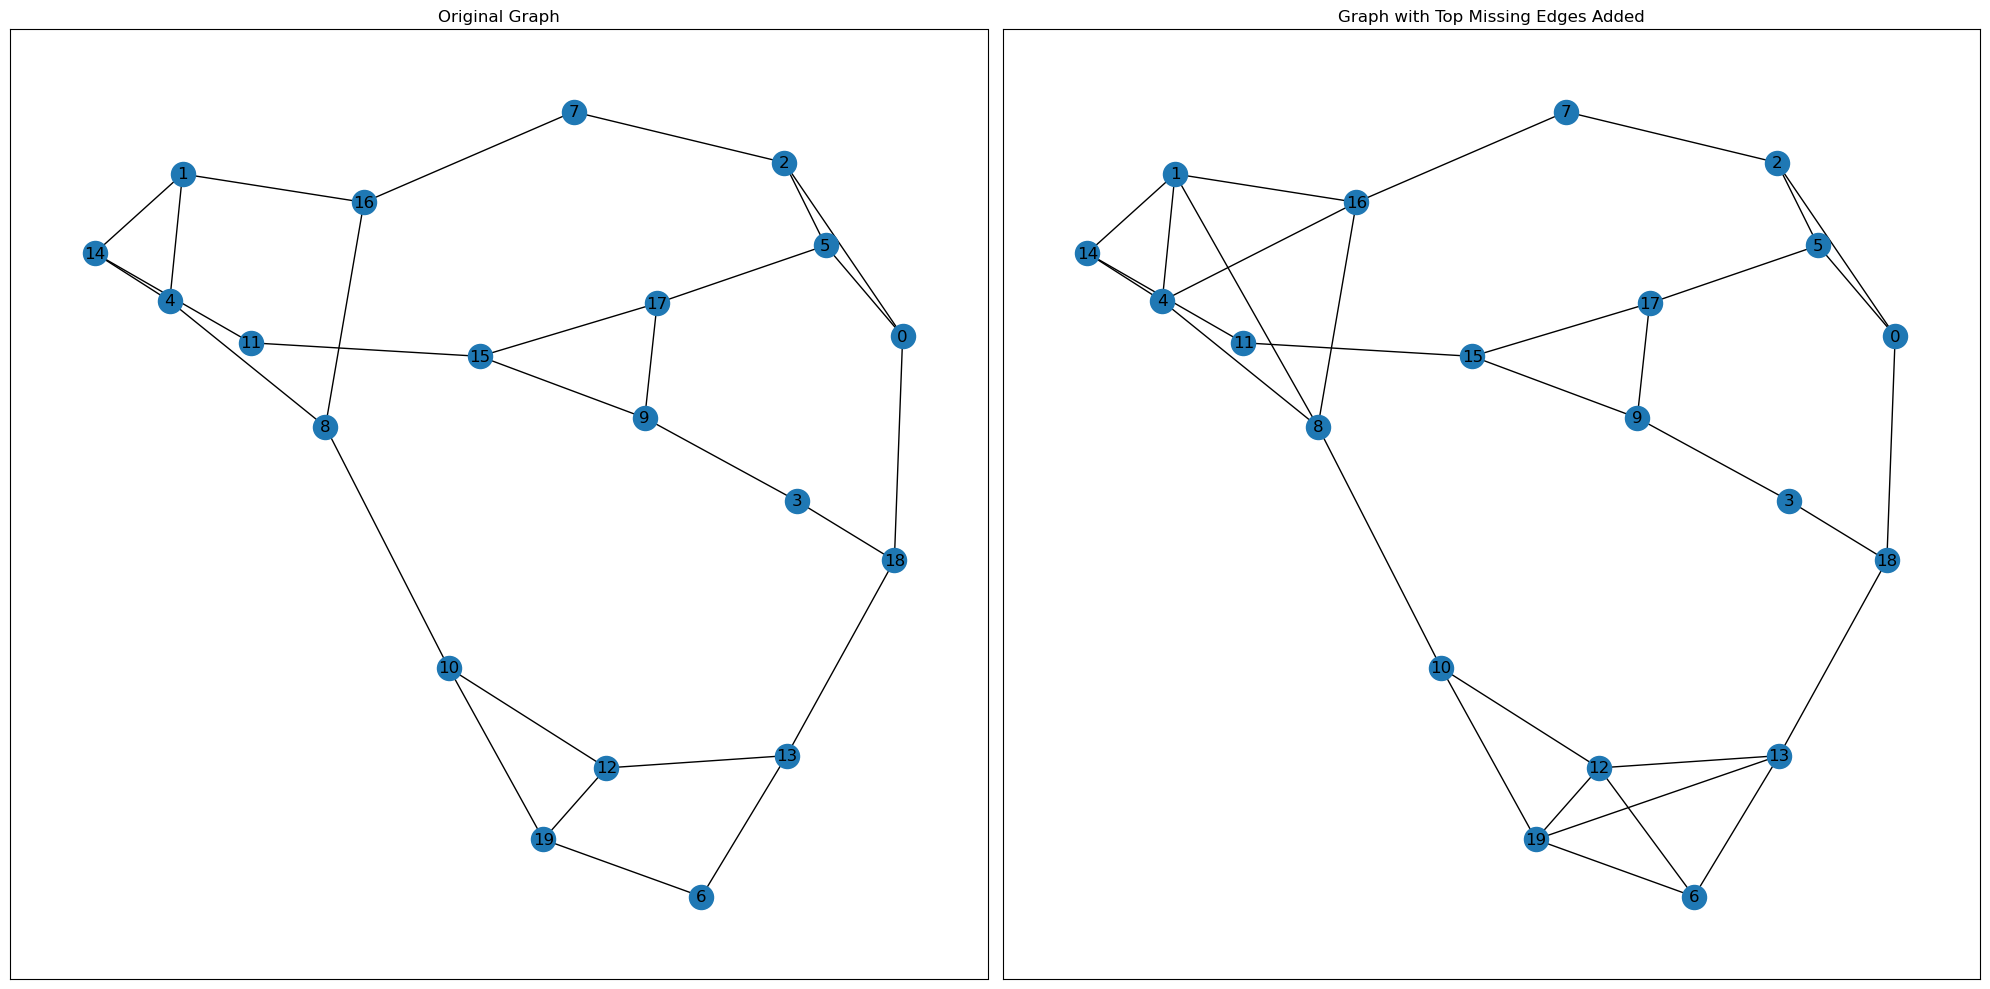

Missing edges with highest common neighbors: [['1', '8'], ['16', '4'], ['12', '6'], ['13', '19']]


In [50]:
def findAllTopMissingEdges(G, pos=None, seed=42, n_top=None):
    """
    Finds all missing edges between node pairs with the highest number of common neighbors.
    If n_top is specified, returns the top n edges with the most common neighbors.
    """
    if pos is None:
        pos = nx.spring_layout(G, seed=seed)

    edge_scores = []
    nodes = list(G.nodes())
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i+1:]:
            if not G.has_edge(node1, node2):
                common_neighbors = len(list(nx.common_neighbors(G, node1, node2)))
                edge_scores.append(((node1, node2), common_neighbors))

    # Sort by number of common neighbors (descending)
    edge_scores.sort(key=lambda x: x[1], reverse=True)

    if n_top is not None:
        # Take top n_top edges
        top_edges = [list(edge_scores[i][0]) for i in range(min(n_top, len(edge_scores)))]
    else:
        # Take all edges with the highest number of common neighbors
        if edge_scores:
            max_common = edge_scores[0][1]
            top_edges = [list(edge[0]) for edge in edge_scores if edge[1] == max_common]
        else:
            top_edges = []

    G_copy = G.copy()
    for edge in top_edges:
        G_copy.add_edge(*edge)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.title("Original Graph")
    nx.draw_networkx(G, pos=pos, node_size=300)

    plt.subplot(1, 2, 2)
    plt.title("Graph with Top Missing Edges Added")
    nx.draw_networkx(G_copy, pos=pos, node_size=300)

    plt.tight_layout()
    plt.show()

    return top_edges

top_common_missing_edges = findAllTopMissingEdges(G, n_top=None)
print("Missing edges with highest common neighbors:", top_common_missing_edges)


The method you have just found probably works well on the previous graph, because it is quite regular. Maybe you can even guess how we generated it. Of course, real-life networks are often less regular, meaning your method might not be well suited for other networks. Let us try your method on a network on a network that is less regular.

**Exercise 3.** Try your method on the graph in the file ```graph_with_missing_links_2.gz```. We reveal we have removed links $\{0, 5\}, \{0, 6\}$ and $\{0, 7\}$. Did your method output one of these edges?

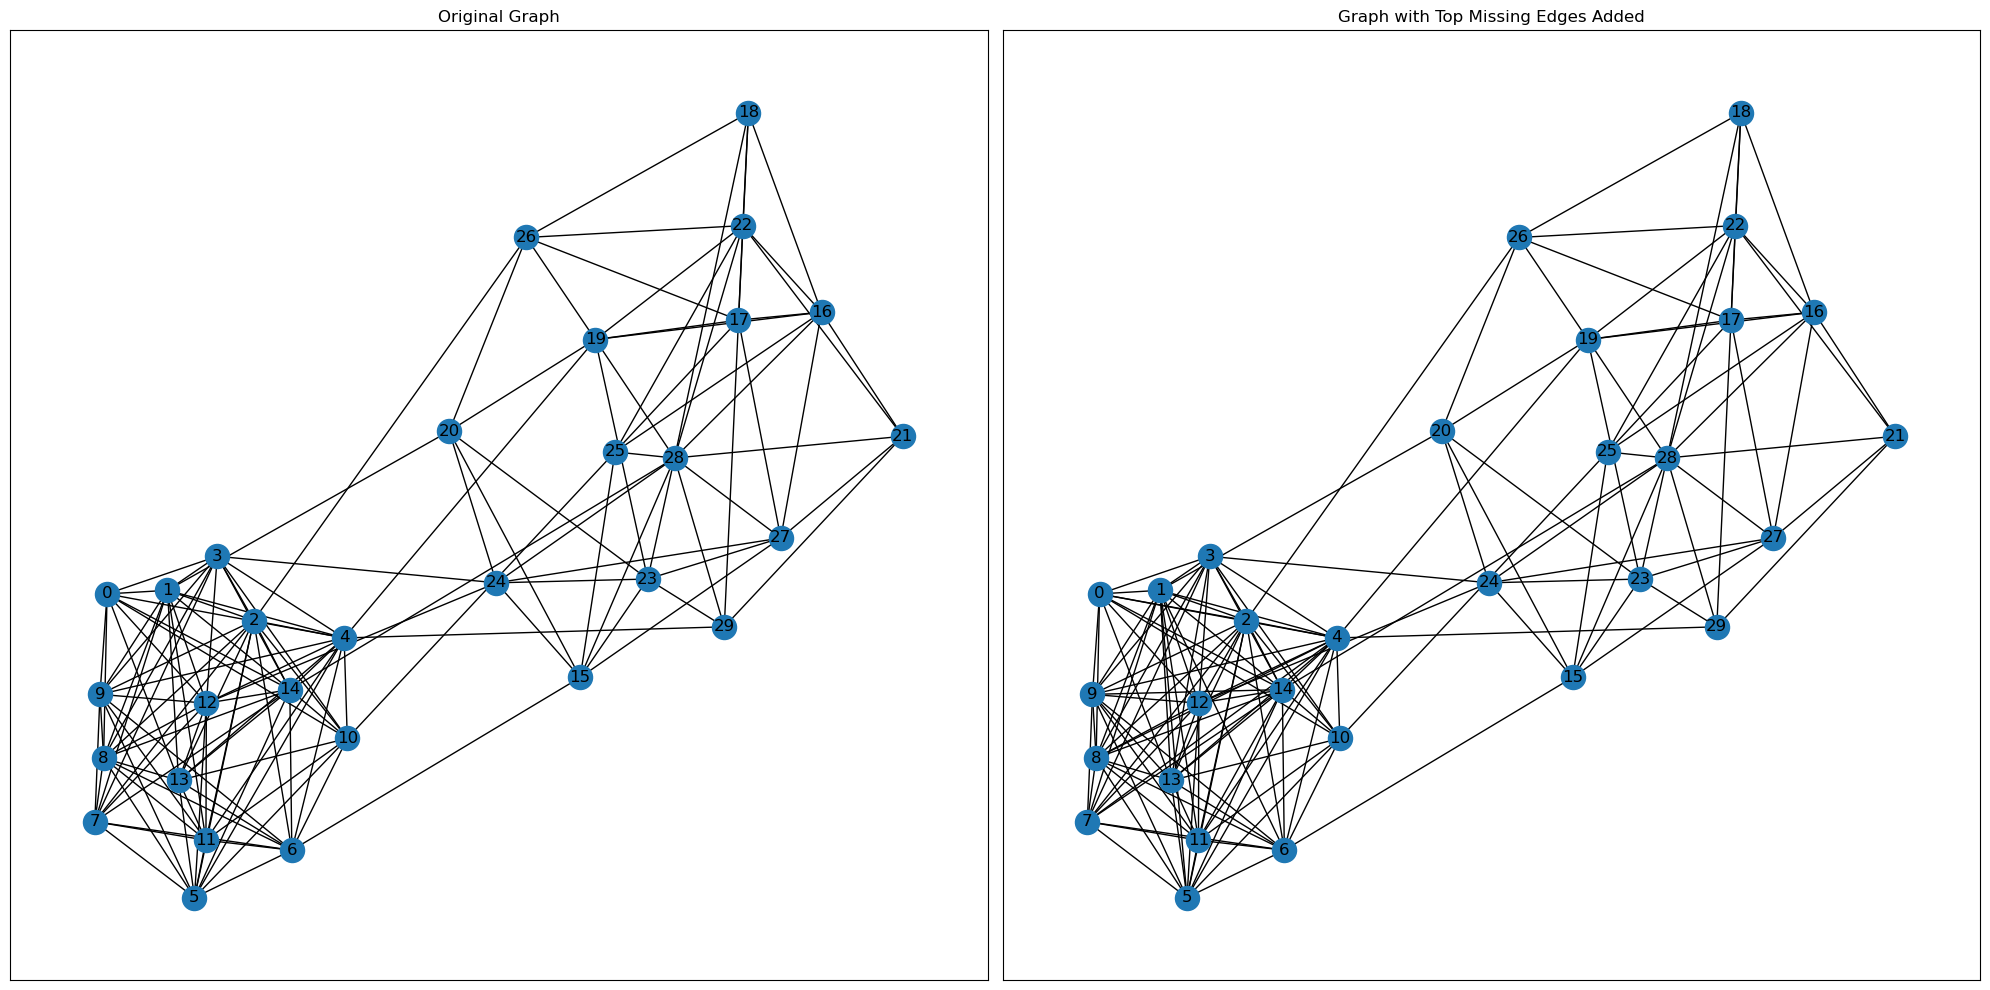

Missing edges with highest common neighbors: [['4', '8'], ['9', '14'], ['12', '2'], ['14', '11'], ['1', '5'], ['4', '7'], ['9', '13'], ['0', '2'], ['1', '6'], ['3', '13']]


In [52]:
#Your answer goes here
file_path = '../Data sets/Link Prediction/graph_with_missing_links_2.gz'
G2 = nx.read_edgelist(file_path)

top_common_missing_edges = findAllTopMissingEdges(G2, n_top=10)
print("Missing edges with highest common neighbors:", top_common_missing_edges)

We reveal that the graph of the previous exercise was generated with a stochastic block model with parameters $\vec{n} = (15, 15)$ and $$P = \begin{pmatrix}
0.8 & 0.05 \\
   0.05  & 0.4
\end{pmatrix}.$$ Note that all removed edges were moving from a vertex of block 1 to another vertex of block 1.

**Exercise 4.** Look back at the edge your method outputted in Exercise 3. Does it connect vertices of the same blocks? If it does not, can you think of a reason why it does not. Adapt your method, so it is better suited for stochastic block models, and test it on the graph from Exercise 3. Ensure your improved method does *not* input $\vec{n}$ or $P$.

It is actually pretty weird that your methods only output *one* edge. In the examples before multiple edges were missing. In practice, you never know how many edges are missing. Moreover, it could be that the first edges your algorithm outputs is wrong while the subsequent ones are correct. Therefore, it makes more sense to give all edges a *score* (called its **reliability**) that measure how "ceartain" your can be this edge is missing from the graph.

**Exercise 5.** Rework your general and stochastic block model specific method to give each edge a reliability. Test your methods again on the two graphs. How high do the actual missing edges rank?

In [ ]:
def findMissingEdgeReliable(G):
    Adj = nx.adjacency_matrix(G)
    reliabilityMatrix = np.zeros_like(Adj)
    
    # Your answer goes here
    
    return reliabilityMatrix

def predictLinkSBMReliable(G):
    Adj = nx.adjacency_matrix(G)
    reliabilityMatrix = np.zeros_like(Adj)
    
    # Your answer goes here
    
    return reliabilityMatrix

We end by testing your new methods on a real-life network. From this network we have removed edge $\{13, 33\}$ and $\{2, 3\}$.

**Exercise 6.** Load the graph ```graph_with_missing_links_3.gz```, and apply both your link prediction methods on this graph. Which method has performed better? Think of reasons why this method has performed better on this real-life network. Can you think of real-life networks where the other method might have been better?

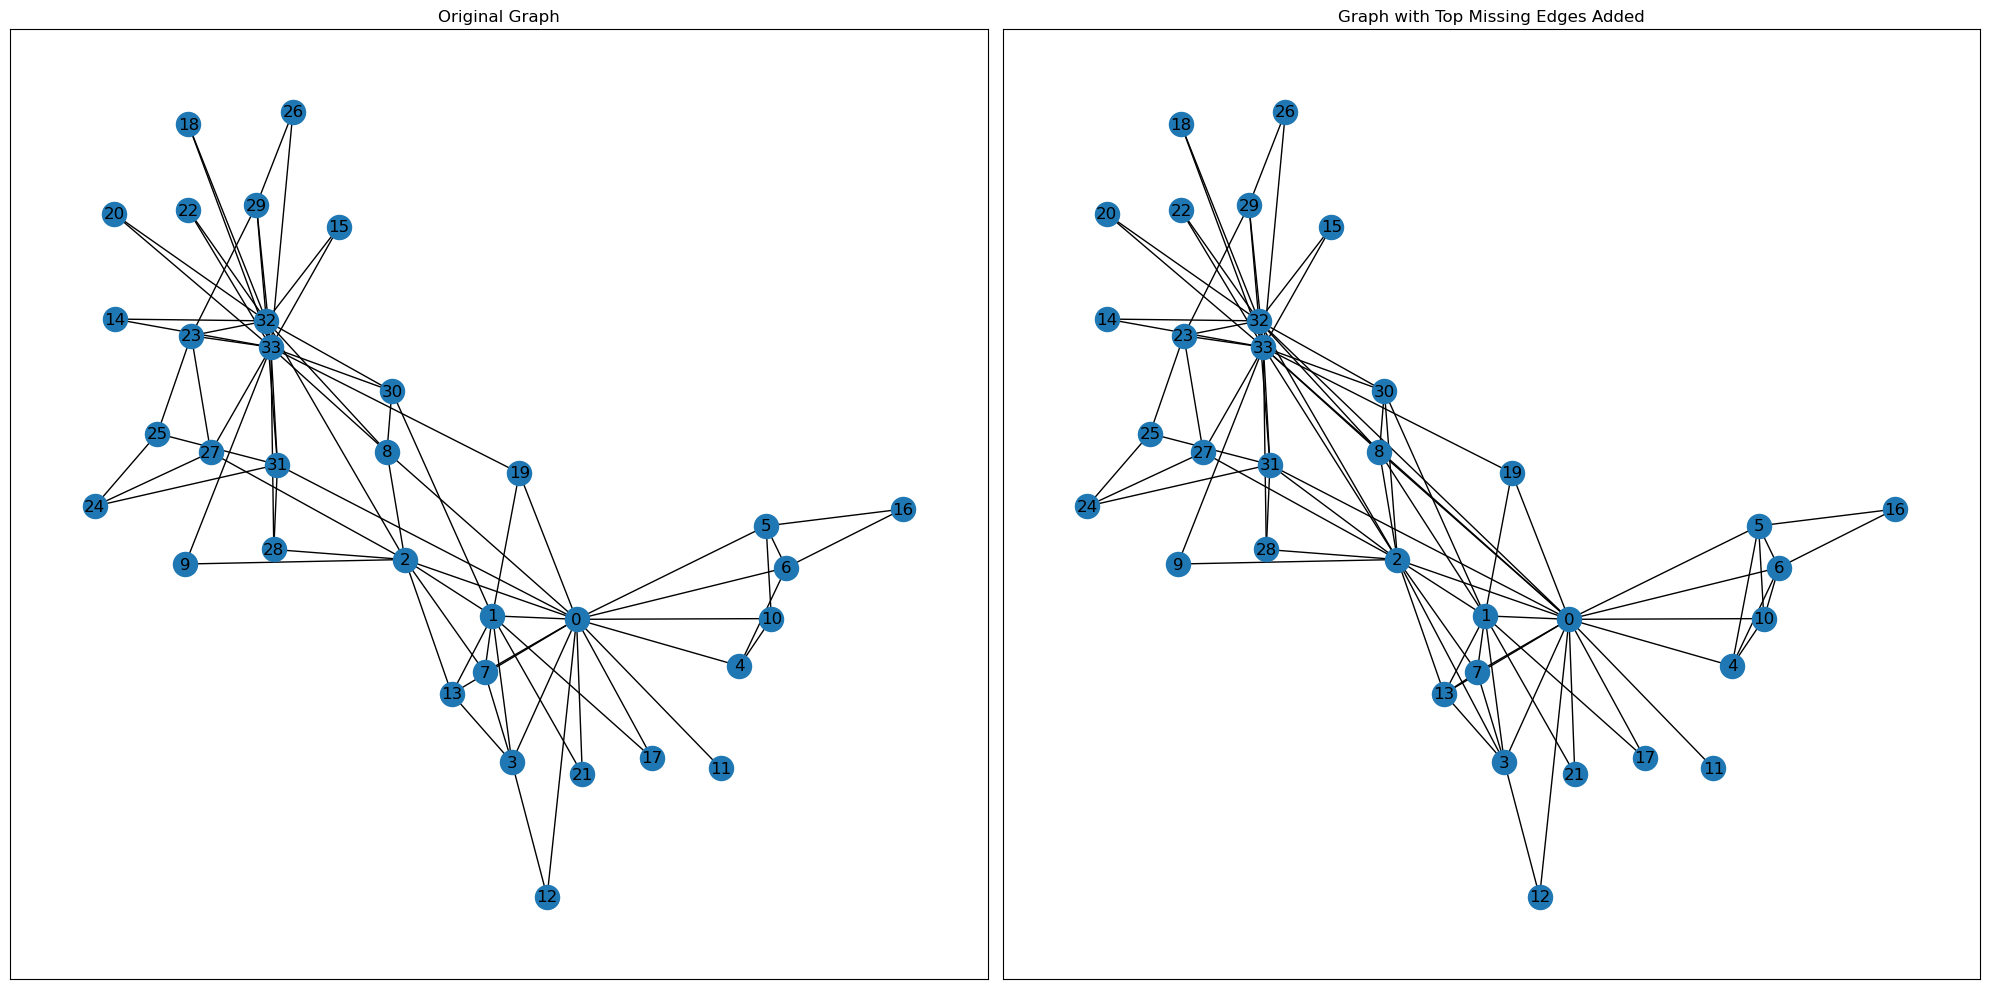

Missing edges with highest common neighbors: [['2', '33'], ['2', '3'], ['7', '13'], ['0', '32'], ['0', '33'], ['1', '8'], ['2', '31'], ['2', '30'], ['4', '5'], ['6', '10']]


In [55]:
path = '../Data sets/Link Prediction/graph_with_missing_links_3.gz'
G3 = nx.read_edgelist(path)

top_common_missing_edges = findAllTopMissingEdges(G3, n_top=10)
print("Missing edges with highest common neighbors:", top_common_missing_edges)
